# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

580

In [3]:
cities

['punta arenas',
 'atengo',
 'kieta',
 'yatou',
 'belushya guba',
 'mataura',
 'kapaa',
 'bokspits',
 'dwarka',
 'fougamou',
 'cape town',
 'arraial do cabo',
 'bilibino',
 'vengerovo',
 'nikolskoye',
 'leh',
 'takoradi',
 'albany',
 'thibodaux',
 'mys shmidta',
 'esperance',
 'illoqqortoormiut',
 'alofi',
 'pandan',
 'saint george',
 'mar del plata',
 'northam',
 'vestmannaeyjar',
 'redmond',
 'avarua',
 'busselton',
 'barrow',
 'jamestown',
 'dikson',
 'the valley',
 'haines junction',
 'ushuaia',
 'kharan',
 'hastings',
 'ambilobe',
 'andarab',
 'palabuhanratu',
 'saint-philippe',
 'rikitea',
 'grindavik',
 'cabo san lucas',
 'dingle',
 'geraldton',
 'nouadhibou',
 'faya',
 'toamasina',
 'butaritari',
 'victoria',
 'carnarvon',
 'sabang',
 'bredasdorp',
 'sambava',
 'armidale',
 'puerto ayora',
 'moroni',
 'santa marta',
 'tubruq',
 'sentyabrskiy',
 'georgetown',
 'bluff',
 'hithadhoo',
 'saskylakh',
 'kodiak',
 'tuatapere',
 'atuona',
 'harbour breton',
 'hobart',
 'castro',
 'cair

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
response=requests.get (f"https://api.openweathermap.org/data/2.5/weather?q={cities[1]}&appid={weather_api_key}").json()
weather= {}
weather["name"]= response["name"]
weather["lat"]= response["coord"]["lat"]
weather["lon"]= response ["coord"]["lon"]
weather["temp"]= response ["main"]["temp_max"]
weather ["humidity"]= response ["main"]["humidity"]
weather["cloudiness"]= response ["clouds"]["all"]
weather["windspeed"]= response ["wind"]["speed"]
weather["country"]= response ["sys"]["country"]
weather["date"]= response ["dt"]

In [5]:
weather

{'name': 'Atengo',
 'lat': 20.1667,
 'lon': -99.3333,
 'temp': 296.74,
 'humidity': 30,
 'cloudiness': 10,
 'windspeed': 3.34,
 'country': 'MX',
 'date': 1676233615}

In [6]:
all_weather= []
for c in cities:
    print (c)
    try:
        response=requests.get (f"https://api.openweathermap.org/data/2.5/weather?q={c}&appid={weather_api_key}").json()
        weather={}
        weather["name"]= response["name"]
        weather["lat"]= response["coord"]["lat"]
        weather["lon"]= response ["coord"]["lon"]
        weather["temp"]= response ["main"]["temp_max"]
        weather ["humidity"]= response ["main"]["humidity"]
        weather["cloudiness"]= response ["clouds"]["all"]
        weather["windspeed"]= response ["wind"]["speed"]
        weather["country"]= response ["sys"]["country"]
        weather["date"]= response ["dt"]
        all_weather.append(weather)
    except:
        print("could not find")
df= pd.DataFrame(all_weather)
df

punta arenas
atengo
kieta
yatou
belushya guba
could not find
mataura
kapaa
bokspits
could not find
dwarka
fougamou
cape town
arraial do cabo
bilibino
vengerovo
nikolskoye
leh
takoradi
albany
thibodaux
mys shmidta
could not find
esperance
illoqqortoormiut
could not find
alofi
pandan
saint george
mar del plata
northam
vestmannaeyjar
redmond
avarua
busselton
barrow
jamestown
dikson
the valley
haines junction
ushuaia
kharan
hastings
ambilobe
andarab
could not find
palabuhanratu
could not find
saint-philippe
rikitea
grindavik
cabo san lucas
dingle
geraldton
nouadhibou
faya
toamasina
butaritari
victoria
carnarvon
sabang
bredasdorp
sambava
armidale
puerto ayora
moroni
santa marta
tubruq
could not find
sentyabrskiy
could not find
georgetown
bluff
hithadhoo
saskylakh
kodiak
tuatapere
atuona
harbour breton
hobart
castro
cairns
los llanos de aridane
broome
mandalgovi
hermanus
barentsburg
could not find
bereda
souillac
longyearbyen
tevriz
naze
yellowknife
matara
lima
bethel
iqaluit
asau
thompson
e

,name,lat,lon,temp,humidity,cloudiness,windspeed,country,date
0,Punta Arenas,-53.1500,-70.9167,285.21,50,40,9.77,CL,1676233616
1,Atengo,20.1667,-99.3333,296.74,30,10,3.34,MX,1676233615
2,Kieta,-6.2167,155.6333,299.37,83,100,2.40,PG,1676233616
3,Yatou,37.1500,122.3833,274.14,61,100,10.34,CN,1676233617
4,Mataura,-46.1927,168.8643,287.18,87,49,0.47,NZ,1676233618
...,...,...,...,...,...,...,...,...,...
524,Berlevåg,70.8578,29.0864,275.15,80,75,12.86,NO,1676233918
525,Kefamenanu,-9.4467,124.4781,294.26,90,98,0.87,ID,1676233918
526,Abomsa,9.9833,39.9833,293.36,33,0,1.36,ET,1676233919
527,Nanortalik,60.1432,-45.2371,264.63,66,100,5.21,GL,1676233919


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [15]:
df.to_csv(output_data_file)
df.head()

,name,lat,lon,temp,humidity,cloudiness,windspeed,country,date
0,Punta Arenas,-53.1500,-70.9167,285.21,50,40,9.77,CL,1676233616
1,Atengo,20.1667,-99.3333,296.74,30,10,3.34,MX,1676233615
2,Kieta,-6.2167,155.6333,299.37,83,100,2.40,PG,1676233616
3,Yatou,37.1500,122.3833,274.14,61,100,10.34,CN,1676233617
4,Mataura,-46.1927,168.8643,287.18,87,49,0.47,NZ,1676233618


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

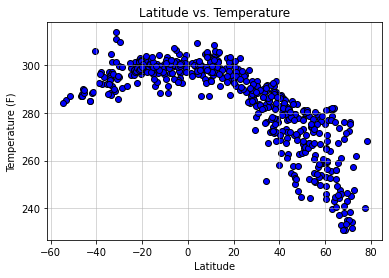

In [29]:
# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(df["lat"], df ["temp"], facecolor = "blue", edgecolor = "black")

# Set title
plt.title("Latitude vs. Temperature")

# Set x axis label
plt.xlabel("Latitude")

# Set y axis label
plt.ylabel("Temperature (F)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)


## Latitude vs. Humidity Plot

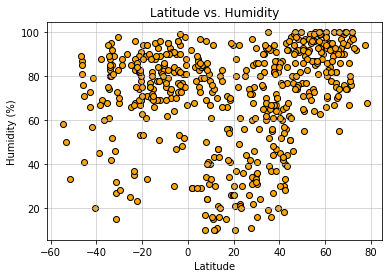

In [33]:
# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(df["lat"], df ["humidity"], facecolor = "orange", edgecolor = "black")

# Set title
plt.title("Latitude vs. Humidity")

# Set x axis label
plt.xlabel("Latitude")

# Set y axis label
plt.ylabel("Humidity (%)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

## Latitude vs. Cloudiness Plot

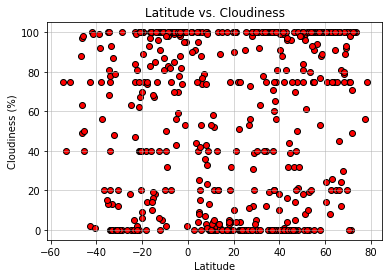

In [32]:
# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(df["lat"], df ["cloudiness"], facecolor = "red", edgecolor = "black")

# Set title
plt.title("Latitude vs. Cloudiness")

# Set x axis label
plt.xlabel("Latitude")

# Set y axis label
plt.ylabel("Cloudiness (%)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

## Latitude vs. Wind Speed Plot

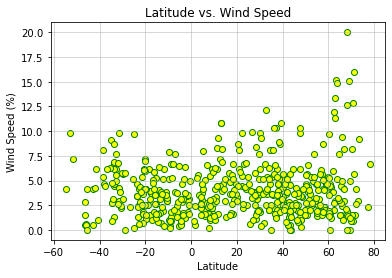

In [35]:
# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(df["lat"], df ["windspeed"], facecolor = "yellow", edgecolor = "green")

# Set title
plt.title("Latitude vs. Wind Speed")

# Set x axis label
plt.xlabel("Latitude")

# Set y axis label
plt.ylabel("Wind Speed (%)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)